In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 6251 files belonging to 9 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1563 files belonging to 9 classes.


In [6]:
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [15]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [17]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [18]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=9,activation='softmax'))

In [19]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [21]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
196/196 [==============================] - 32s 116ms/step - loss: 1.6094 - accuracy: 0.4222 - val_loss: 1.2025 - val_accuracy: 0.5617
Epoch 2/50
196/196 [==============================] - 17s 84ms/step - loss: 1.1609 - accuracy: 0.5828 - val_loss: 0.9828 - val_accuracy: 0.6507
Epoch 3/50
196/196 [==============================] - 17s 85ms/step - loss: 0.9405 - accuracy: 0.6653 - val_loss: 0.9464 - val_accuracy: 0.6660
Epoch 4/50
196/196 [==============================] - 17s 85ms/step - loss: 0.7760 - accuracy: 0.7319 - val_loss: 0.7585 - val_accuracy: 0.7364
Epoch 5/50
196/196 [==============================] - 17s 85ms/step - loss: 0.5886 - accuracy: 0.7997 - val_loss: 0.7051 - val_accuracy: 0.7594
Epoch 6/50
196/196 [==============================] - 17s 86ms/step - loss: 0.4693 - accuracy: 0.8408 - val_loss: 0.6030 - val_accuracy: 0.8164
Epoch 7/50
196/196 [==============================] - 17s 85ms/step - loss: 0.3796 - accuracy: 0.8727 - val_loss: 0.5284 - val_accuracy

In [22]:
#Training set ki Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

196/196 [==============================] - 6s 30ms/step - loss: 0.0043 - accuracy: 0.9986
Training accuracy: 0.9985602498054504


In [23]:
#Validation set ki Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

49/49 [==============================] - 2s 29ms/step - loss: 0.5385 - accuracy: 0.9028
Validation accuracy: 0.9027511477470398


In [24]:
cnn.save('trained_cotton_disease_model.keras')

In [25]:

training_history.history

{'loss': [1.6094365119934082,
  1.1608942747116089,
  0.9404691457748413,
  0.775969386100769,
  0.5886295437812805,
  0.46926507353782654,
  0.379585325717926,
  0.27255481481552124,
  0.19306732714176178,
  0.16758814454078674,
  0.12800005078315735,
  0.13347598910331726,
  0.08028022944927216,
  0.09682577848434448,
  0.05714181065559387,
  0.11241041123867035,
  0.06947752088308334,
  0.07482552528381348,
  0.05448029190301895,
  0.03000442311167717,
  0.05101848766207695,
  0.05193154513835907,
  0.05604690685868263,
  0.05265551432967186,
  0.026313787326216698,
  0.025922326371073723,
  0.02711459808051586,
  0.07519496232271194,
  0.02923334576189518,
  0.019967133179306984,
  0.04265672340989113,
  0.044312484562397,
  0.0494038350880146,
  0.03408369794487953,
  0.05626784637570381,
  0.050408005714416504,
  0.036817438900470734,
  0.007637560833245516,
  0.0114921685308218,
  0.010978546924889088,
  0.002769037149846554,
  0.02710430510342121,
  0.05380432680249214,
  0.029

In [26]:
#History record krrha json mei 
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


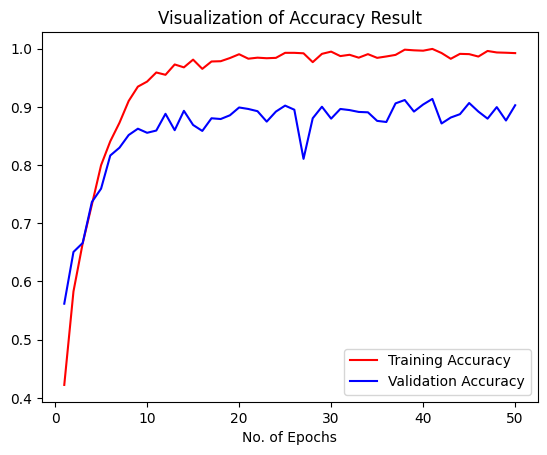

In [28]:
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [29]:
class_name = validation_set.class_names

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1563 files belonging to 9 classes.


In [31]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1563/1563 [==============================] - 6s 4ms/step


In [32]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [33]:
Y_true

<tf.Tensor: shape=(1563,), dtype=int64, numpy=array([0, 0, 0, ..., 8, 8, 8], dtype=int64)>

In [34]:
predicted_categories

<tf.Tensor: shape=(1563,), dtype=int64, numpy=array([0, 0, 0, ..., 8, 8, 8], dtype=int64)>

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(Y_true,predicted_categories)

In [36]:
# Precision Recall & Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                           precision    recall  f1-score   support

                  Healthy       0.95      0.91      0.93       330
          Infected-Aphids       0.96      0.87      0.91       149
       Infected-Army worm       0.87      0.92      0.89       160
Infected-Bacterial Blight       0.87      0.87      0.87       249
 Infected-Cotton Boll Rot       0.97      0.96      0.97       192
      Infected-Curl Virus       0.87      0.89      0.88        83
  Infected-Fussarium Wilt       0.77      0.93      0.84        82
  Infected-Powdery mildew       0.96      0.97      0.96       160
     Infected-Target Spot       0.81      0.80      0.81       158

                 accuracy                           0.90      1563
                macro avg       0.89      0.90      0.90      1563
             weighted avg       0.91      0.90      0.90      1563



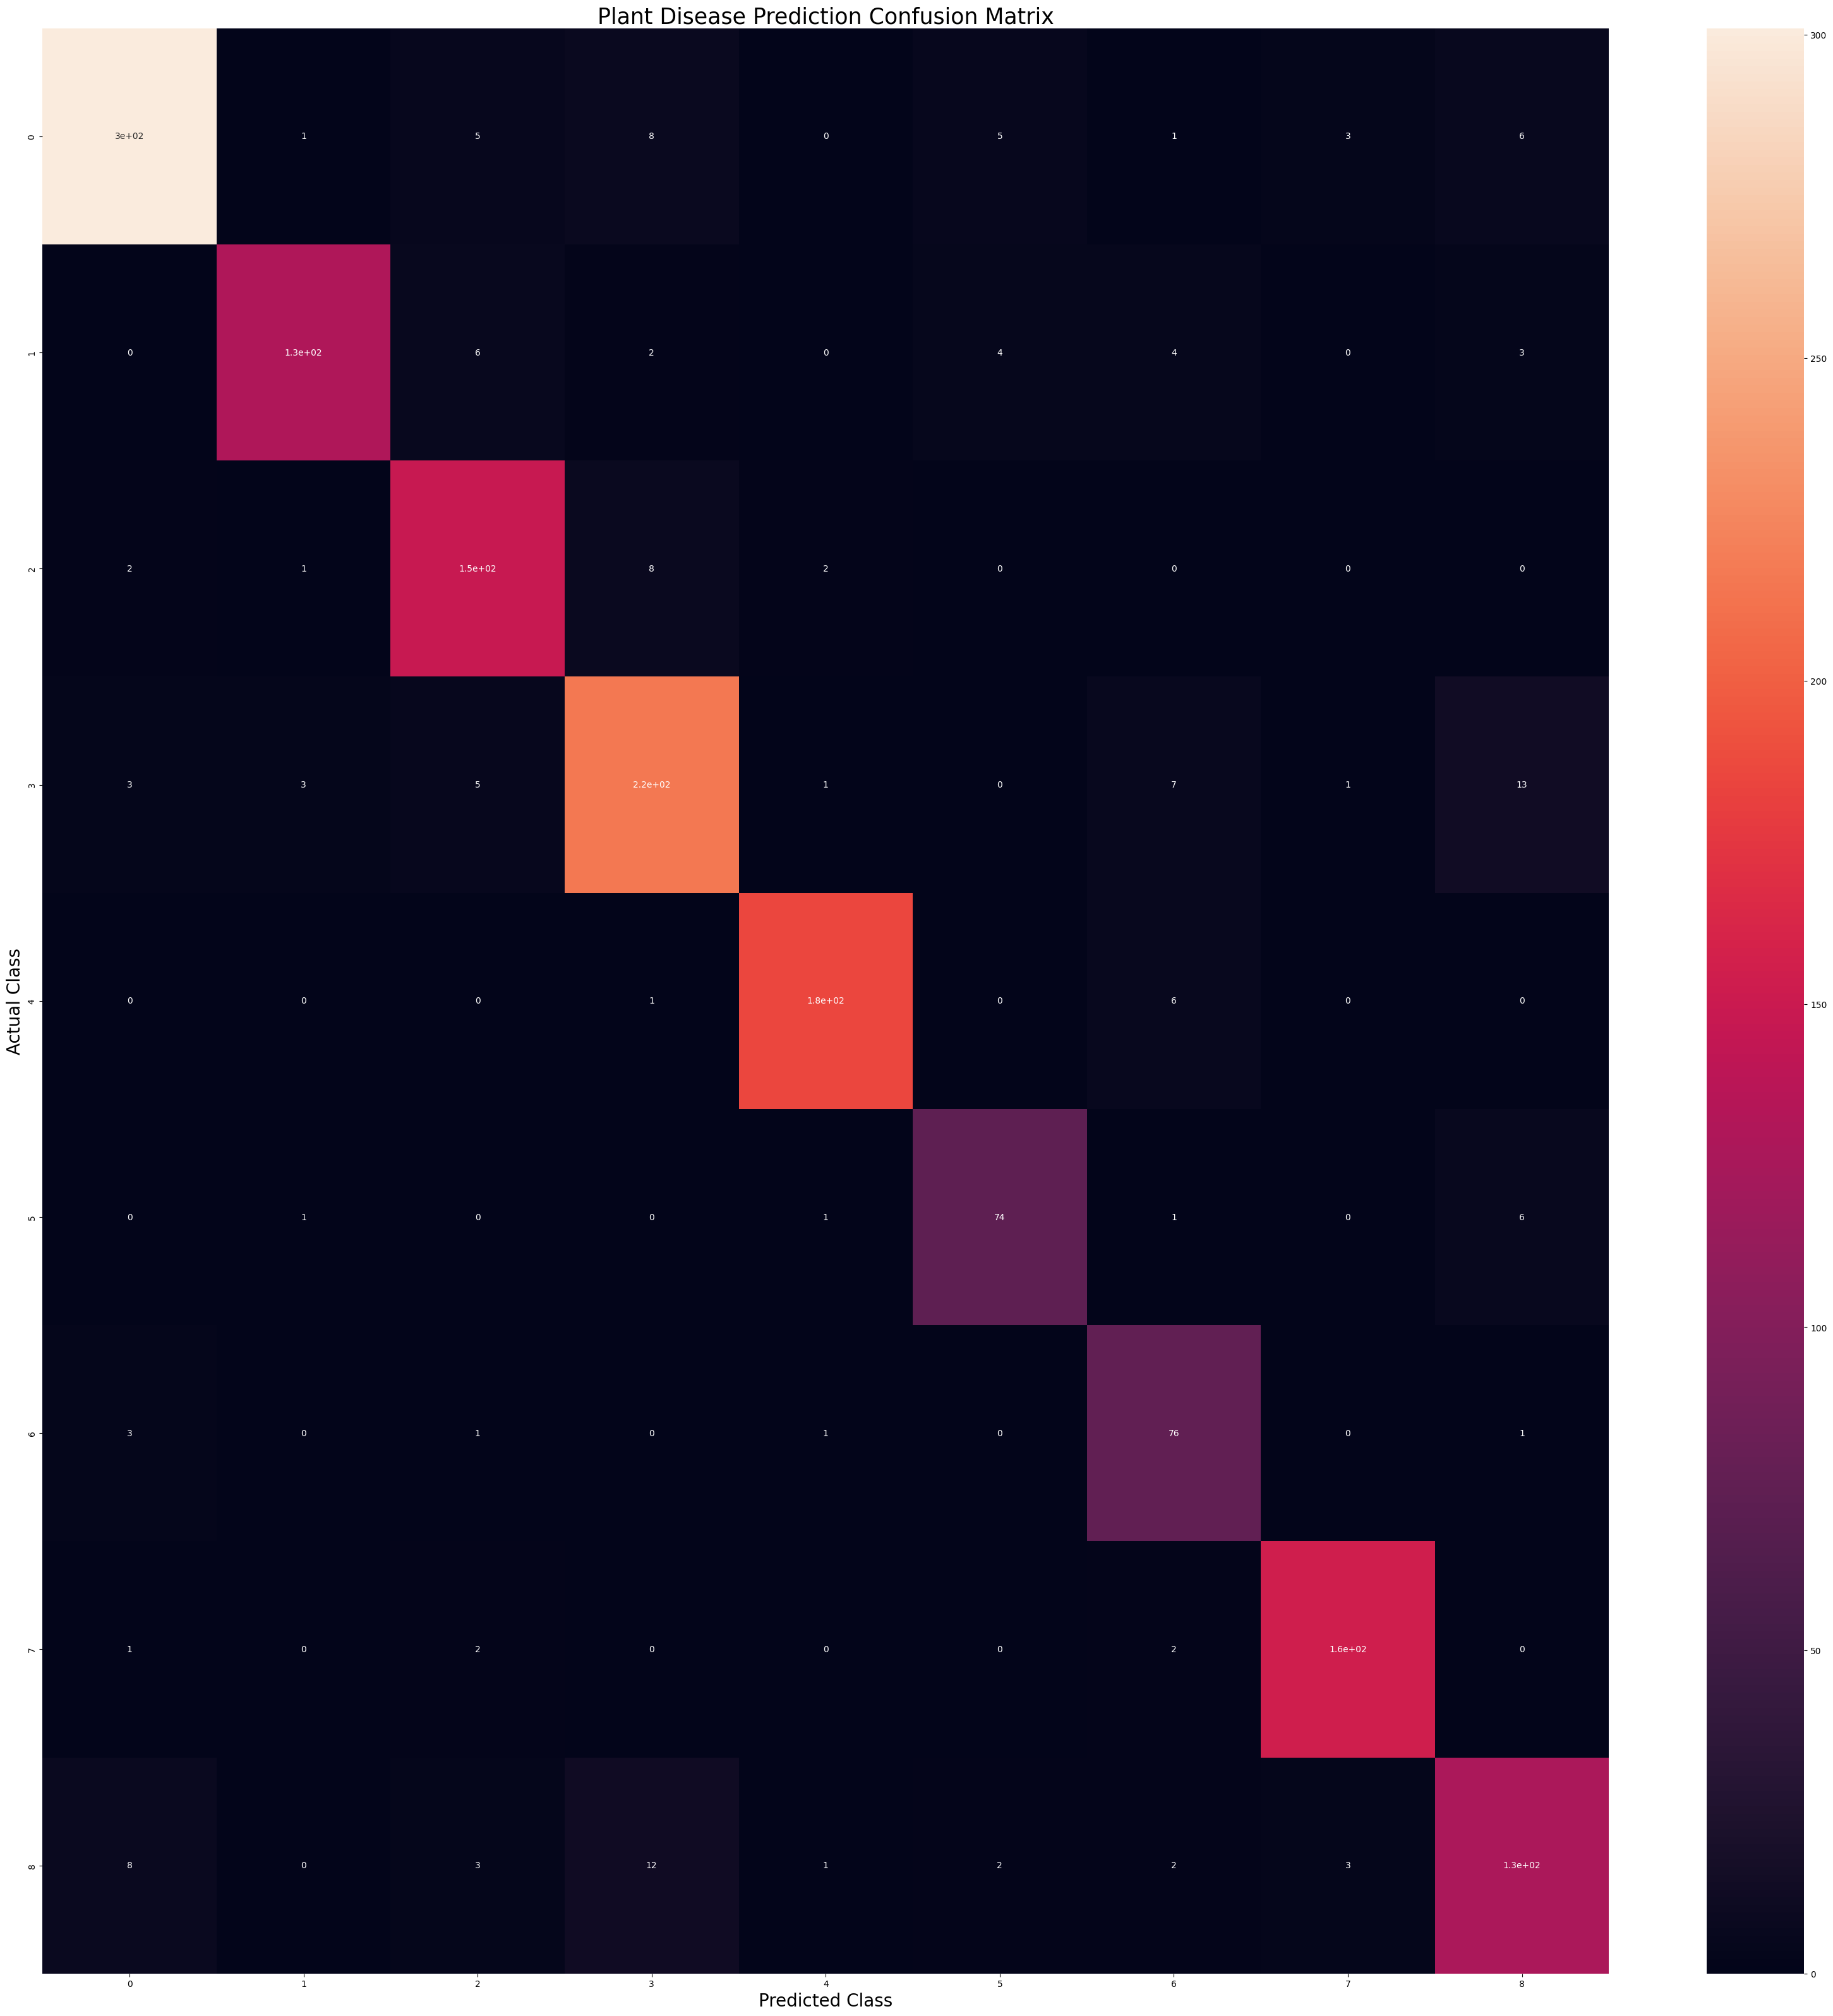

In [37]:
#confusion waali matrix
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()


In [39]:
# Convert the Keras model to h5 format
cnn.save('trained_cotton_disease_model.h5')
print("Model successfully saved in h5 format.")

Model successfully saved in h5 format.
